In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.odr import * 

In [2]:
data = pd.read_csv('isocro.csv', header = 0)
data.tail()

,Full,log(Age),M,log(Teff),Mbol,Mv,(U-B)o,(B-V)o,(V-R)o,(V-I)o,(V-J)o
6556,6557,6.6,51.8303,4.306,-9.88,-7.96,-0.88,-0.21,-0.09,-0.21,-0.51
6557,6558,6.6,51.8353,4.238,-9.89,-8.36,-0.81,-0.18,-0.06,-0.16,-0.42
6558,6559,6.6,51.8403,4.173,-9.90,-8.73,-0.69,-0.16,-0.05,-0.12,-0.33
6559,6560,6.6,51.8453,4.069,-9.92,-9.32,-0.44,-0.12,-0.02,-0.05,-0.19
6560,6561,6.6,51.8503,3.980,-9.93,-9.75,-0.21,-0.05,0.01,0.02,-0.02


In [3]:
idades = data['log(Age)']
age = np.array([])
for element in idades:
    if element in age:
        continue
    elif element not in age:
        age = np.append(age,element)



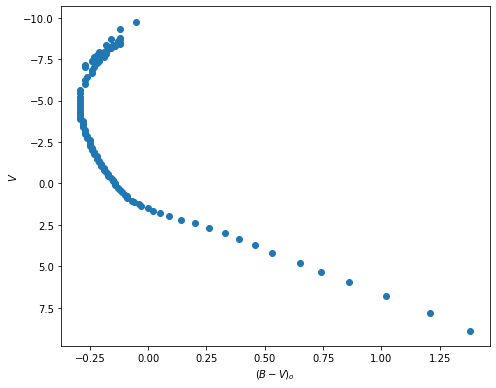

In [9]:
plt.figure(figsize=(7,5.5))
plt.gca().invert_yaxis()
exemplo = data[data['log(Age)'] == 6.6]
x = exemplo['(B-V)o']
y = exemplo['Mv']
plt.scatter(x, y)
plt.xlabel(r"$( B-V)_o$")
plt.ylabel(r"$V$")
plt.tight_layout()


In [ ]:
nova = data[data['log(Age)']==7.6]
Mv = nova['Mv']
x = nova['(B-V)o'] 
plt.gca().invert_yaxis()
plt.scatter(x,Mv, color = 'none', edgecolor = 'blue')
#plt.plot(x,y, '--')

In [ ]:
lx = x.tolist()
ly = Mv.tolist()

i = 0
index = 0

for element in lx:
    if i>= 1:
        if lx[i-1] - element <0:
            index = i-1
            break
    i+=1

valor = lx[index]
i = 0
for element in lx:
    if element == valor:
        index = i
        break
    i+=1

plt.gca().invert_yaxis()
plt.scatter(lx[index], ly[index], color = 'red', zorder = 100)
plt.scatter(x,Mv, color = 'none', edgecolor = 'blue');

In [ ]:
x1 = lx[:index]
y1 = ly[:index]
plt.gca().invert_yaxis()
plt.scatter(x1,y1)

In [ ]:
from scipy import stats

result = stats.linregress(x1,y1)


In [ ]:
coef = np.array([result.slope,result.intercept])
error = np.array([result.stderr, result.intercept_stderr])

In [ ]:
sigma = 1
up = coef + sigma*error
down = coef - sigma*error

x1 = np.asarray(x1)
def linear_func(p, x):
    m, c = p
    return m*x + c

tfit = np.linspace(x1.min(),x1.max(),len(x1))

fitup = linear_func(up,tfit)
fitdown = linear_func(down,tfit)



In [ ]:
mup, bup = up[0],up[1]
mdw, bdw = down[0], down[1]

xadj = []
yadj = []

for a,b in zip(x1,y1):
    if (a*mup + bup) >= b and (a*mdw + bdw) <= b:
        xadj.append(a)
        yadj.append(b)
xadj =np.asarray(xadj)
yadj = np.asarray(yadj)

In [ ]:
vrau = stats.linregress(xadj,yadj)

In [ ]:
plt.gca().invert_yaxis()
plt.plot(x1, result.slope*x1 + result.intercept, color = 'red')
plt.scatter(x1,y1, color = 'none', edgecolor = 'blue')
plt.fill_between(tfit,fitup,fitdown, alpha = 0.25)
plt.plot(tfit,tfit*vrau.slope + vrau.intercept)

In [ ]:
len(x1),len(xadj)

In [ ]:
vapo = pd.read_csv('Regression_Iso.txt', header = 0)
vapo.tail()